
### CETM46 – Data Science Product Development Patrt 2

---



---



---



---


## **1.Introduction**

## Application Domain: 

Computer hardware industry or the consumer electronics industry

## Problem Statement

This notebook conduct trend analysis, forecasting, and recommendation to provide insights to customers and manufacturers on the performance, features, and prices of laptops. 
<br>

The dataset will contain information such as the brand, model, specifications, prices, and ratings of laptops. 

### Goals
- The goal is to analyze this information to identify patterns and trends in the market, forecast future demand.
- provide recommendations to customers on the best laptops to purchase based on their needs and budget. 
- The dataset will be used by manufacturers to gain insights into the market and make informed decisions about product development and pricing strategies.



## Data Attribution
* Data preparation steps required to clean and prepare the data for analysis. This would include data cleaning, data transformation, and data integration.

* Data visualization techniques including charts, graphs and how they can be used to gain insights into sales performance metrics.

* Exploratory Data Analysis: This section would cover various aspects of data analysis, such as visualizing the data, identifying patterns, and summarizing key statistics.




# Table of Content : 

[1. Installing Library](#1.Installation)

[2. Importing Library](#2.Importing_Libraries_and_Packages)

[3. Data Collection](#3.Data_Collection) 

[4. Data Inspection and Validation](#4.Data_Inspection_and_Validation) 

[5. Data Appropriations](#5.Data_Approriation) 

[6. Data Visualisation ](#6.Data_Visualisation) 

[7. Conclusion](#7.Conclusion)

[8. Reflection](#8.Reflection)

## An extensive dataset of laptops for trend analysis, forecasting & Recommendation

**Objectives** 

- To analyze the trends in the laptop industry and identify the key factors that influence consumer preferences and purchase decisions.
- To develop a forecasting model that can predict future demand for laptops based on historical sales data and market trends.
- To recommend specific laptop brands and models to consumers based on their needs and preferences.
- To provide insights to laptop manufacturers on how they can improve their product offerings and marketing strategies to better meet consumer demands.
- To contribute to the existing body of knowledge in the field of data analytics and machine learning by demonstrating the application of these techniques in the laptop industry.
- To generate a reproducible notebook, to evaluate the store sales performance and other key features influencing the sales for the given period.


# 1.Installation

In this Notebook we are using [Pandas](https://pandas.pydata.org) to process the dataset, [Plotly Express](https://plotly.com/python/plotly-express/) and [Matplotlib](https://matplotlib.org/) to produce the visualisations. Other packages will also use for the analysis are stated below.

In [4]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install plotly_express
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post4-py3-none-any.whl size=2973 sha256=09d88bc7e95b81516e3ac2bfeea67bbaf394e1a456729caff87fb80e113caa77
  Stored in directory: /root/.cache/pip/wheels/d5/b2/a9/590d15767d34955f20a9a033e8db973b79cb5672d95790c0a9
Successfully built sklearn


# 2. Importing the necessary packages

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score


# 3. Load Csv



### The csv file `Laptop_Information.csv` for this dataset is stored in the root directory.

- read as csv and store the value in the variable name `df`. which is an abbreviation for `DataFrame`


In [6]:
df = pd.read_csv('laptop_price.csv', encoding='latin-1')


In [7]:
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [8]:
df.sample(3)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
77,79,Dell,Inspiron 5570,Notebook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,128GB SSD + 1TB HDD,Intel UHD Graphics 620,Windows 10,2.02kg,855.0
112,115,Lenovo,ThinkPad Yoga,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.37kg,1399.0
320,325,HP,Elitebook 840,Notebook,14.0,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.48kg,1292.0


The code above `df.sample(3)` is a Pandas method that returns a random sample of 3 rows from a DataFrame df. This method is useful when we want to quickly view a random subset of the data to get a sense of its overall structure or to perform exploratory data analysis.

# 4. Data Inspection

In [9]:
df.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

`df.columns` returned value is a list of strings representing the column names in the order they appear in the DataFrame. This is helpful in inspecting the columns and renaming in Wrongly labelled columns.

From inspection, we can easily relate with all column names. There won't be need for renaming the columns.

In [10]:
df.shape

(1303, 13)

`df.shape` helps to inspect the rows and columns stored in our `df`. The data contained in `df` contained `984` rows and `13` columns.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [12]:
df.duplicated().sum()

0

In [13]:
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

`df.duplicated().sum()` returns 0.

The advantage of checking for duplicated rows is that it helps ensure the quality and integrity of the data. Duplicate rows can arise from various sources such as human error during data entry or data scraping, data merging, or data storage. Duplicates can introduce bias into the analysis, skewing the results and leading to inaccurate conclusions. Therefore, identifying and removing duplicates is an important step in data cleaning and preprocessing.

In summary, df.duplicated().sum() is a simple and quick method to check for duplicates in the data, and its output can be used to ensure the quality and integrity of the data and to improve the accuracy of the analysis.

Upon inspection, it returns 0 which is a clear indication it is clear indication there is no duplicate across the rows

<br>

Unlike the `df.duplicated().sum()`, `df.isnull().sum()` is a Pandas method that returns the number of missing or null values in each column of a DataFrame df. The advantage of this method is that it helps identify the amount and location of missing data in the data set. Missing data can be a result of various factors such as incomplete data entry, data corruption, or missing values in the original data source. Identifying and handling missing data is important in data analysis because it can affect the results and conclusions drawn from the data.

 <br>

In summary, while both df.isnull().sum() and df.duplicated().sum() are useful methods in EDA, they serve different purposes. df.isnull().sum() helps identify missing data, and df.duplicated().sum() helps identify and remove duplicate data.

# 4. Data Appropriation/ Cleaning

In [14]:
df.drop(columns=['laptop_ID','Product'],inplace=True)

The `laptop_ID and Product` columns are not a necessary feature for prediction. Due to multitudes of random Information.

In [15]:
#Now remove GB and kg in 'Ram' and 'Weight' columns
df['Ram']=df['Ram'].str.replace('GB','')
df['Weight']=df['Weight'].str.replace('kg','')

In [16]:
#convert the 'Ram' and 'Weight' columns object to Int and float
df['Ram']=df['Ram'].astype('int32')
df['Weight']=df['Weight'].astype('float32')

The `Ram and Weight` columns was stripped off the non-numeral characters and converted to the appropriate numeral data types `(int and float)` respectively. 

# 3. Data Visualization and Analysis

In [17]:
#Data Analysis 
fig = px.histogram(df, x='Price_euros')
fig.show()

From the graph above, There is Laptop prices of range 400-500 are the most available and trending laptops. Higher Prices is a sign of low trend in the dataset

<Axes: >

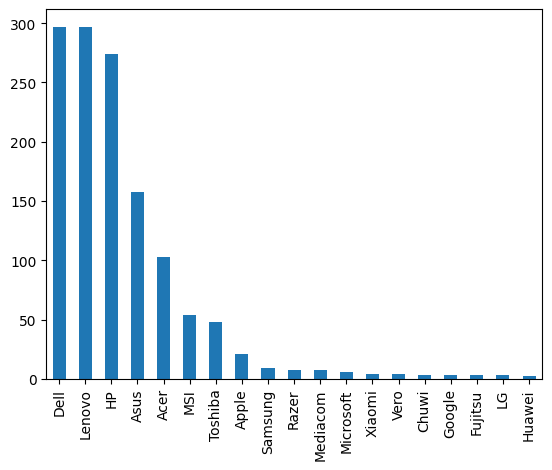

In [18]:
df['Company'].value_counts().plot(kind='bar')

Upon Inspection, Dell and Lenovo Laptops are more Popular than any other Company.

With the Huawei Laptop having the lowest trend.

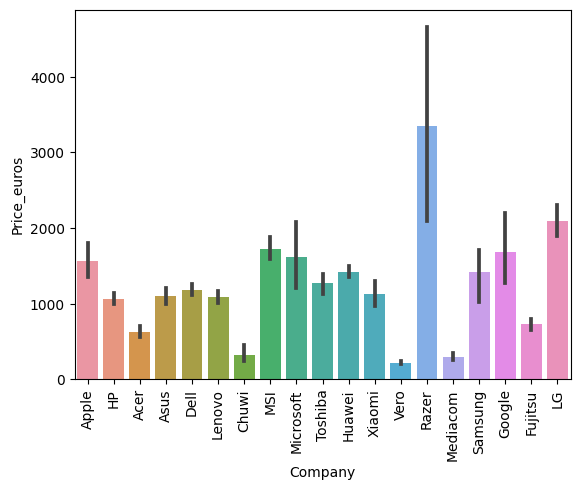

In [19]:
sns.barplot(x=df['Company'],y=df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: >

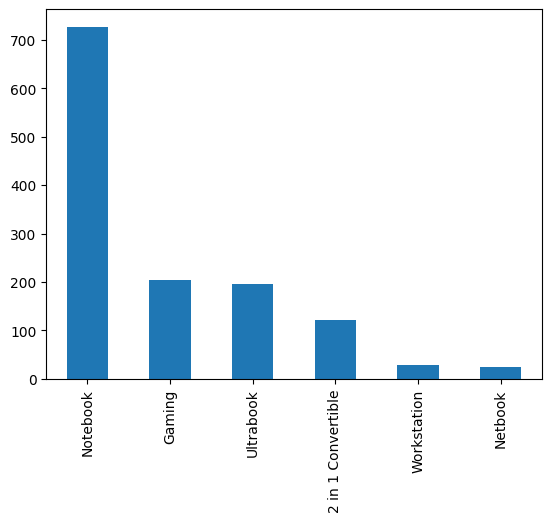

In [20]:
#now TypeName
df['TypeName'].value_counts().plot(kind='bar')

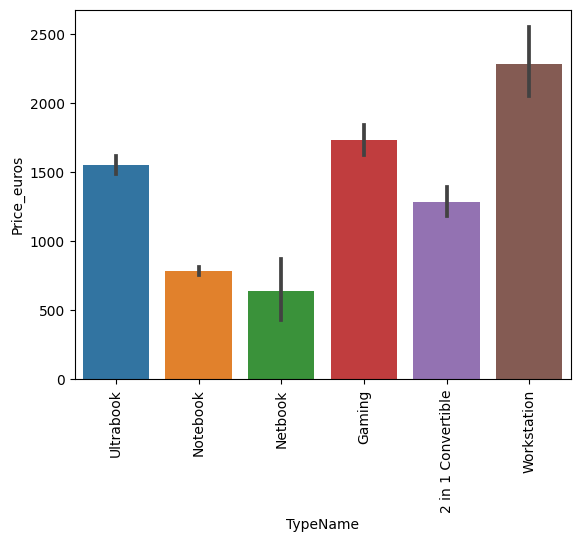

In [21]:
#with price
sns.barplot(x=df['TypeName'],y=df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

NoteBooks are the most Popular, while Workstation are more expensive when tallied on the average price

In [22]:
fig = px.histogram(df, x='Inches')
fig.show()

<Axes: xlabel='Inches', ylabel='Price_euros'>

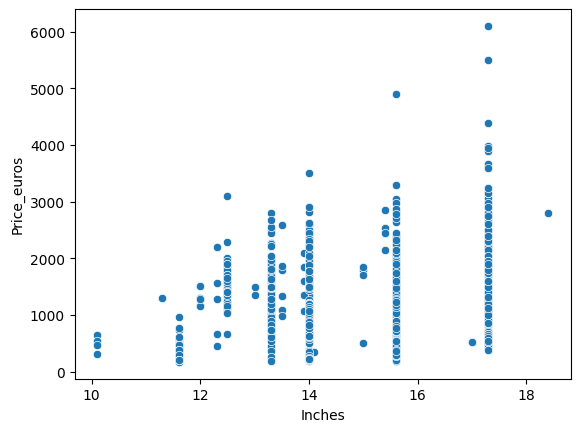

In [23]:
#with price
sns.scatterplot(x=df['Inches'],y=df['Price_euros'])

# 4.Feature Engineering

In [24]:
# now ScreenResolution
df['ScreenResolution'].value_counts()#create one column for touch feature in laptops
df['TouchScreen']=df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)


<Axes: >

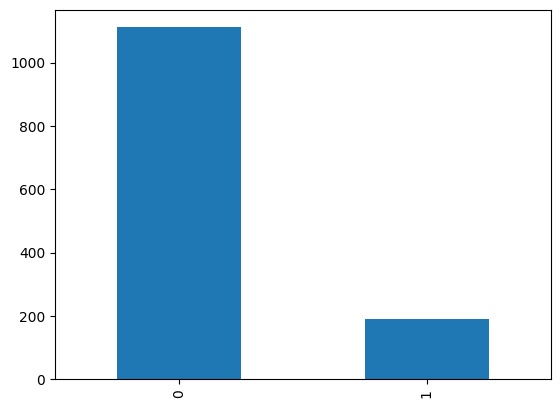

In [25]:
df['TouchScreen'].value_counts().plot(kind='bar')
#0=laptop without touchscreen
#1=laptop with touchscreen


The code above creates an int type categorical features `TouchScreen` for laptops with and without screen. More like a Boolean Field. 


0 == No TouchScreen
<br>
1 == TouchScreen Device

In [26]:
touchscreen_counts = pd.DataFrame(df['TouchScreen'].value_counts()).reset_index()
touchscreen_counts.columns = ['TouchScreen', 'Count']
# plot the bar chart using plotly express
fig = px.bar(touchscreen_counts, x='TouchScreen', y='Count', color='TouchScreen', 
             labels={'TouchScreen': 'Touch Screen'}, 
             color_discrete_sequence=['#1f77b4', '#ff7f0e'])
fig.show()

In [27]:
#Create one more for IPS functio.
df['IPS']=df['ScreenResolution'].apply(lambda x:1 if'IPS' in x else 0)

<Axes: >

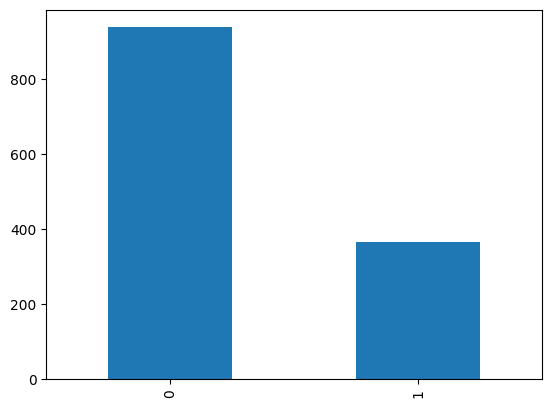

In [28]:
df['IPS'].value_counts().plot(kind='bar')


<Axes: xlabel='IPS', ylabel='Price_euros'>

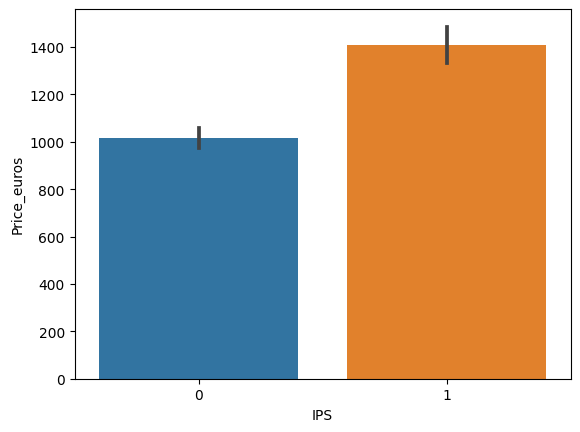

In [29]:
#with price
sns.barplot(x=df['IPS'],y=df['Price_euros'])

In [30]:
#now create 2 more column for resolution from ScreenResolution column
new=df['ScreenResolution'].str.split('x',n=1,expand=True)

In [31]:
new

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600
...,...,...
1298,IPS Panel Full HD / Touchscreen 1920,1080
1299,IPS Panel Quad HD+ / Touchscreen 3200,1800
1300,1366,768
1301,1366,768


In [32]:
#2nd column is good but 1st have some problem okay 
df['Height_res']=new[0]
df['Width_res']=new[1]

In [33]:
df['Width_res'].head()

0    1600
1     900
2    1080
3    1800
4    1600
Name: Width_res, dtype: object

In [34]:
#now remove the strings in X_res column with the help of regular expression
df['Height_res'] = df['Height_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [35]:
df["Height_res"] = df["Height_res"].astype("int")
df["Width_res"] = df["Width_res"].astype("int")

In [36]:
df.sample()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,Height_res,Width_res
1242,Acer,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4,500GB HDD,Intel HD Graphics 520,Linux,2.4,361.8,0,0,1366,768


In [37]:
#create last feature PPI (Pixel per inch) with the help of X_res,Y_res and Inches columns
df['PPI'] = (((df['Height_res']**2) + (df['Width_res']**2))**0.5/df['Inches']).astype('float')

In [38]:
#now drop Inches,X_res,Y_res and ScreenResolution
df.drop(columns=['ScreenResolution','Inches','Width_res','Height_res'],inplace=True)

In [39]:
# now cpu
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [40]:
#create more columns aCC. TO THE CATEGORY 
df['Cpu_Name']=df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [41]:
df.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,PPI,Cpu_Name
1179,HP,Notebook,Intel Core i3 6100U 2.3GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,2.07,650.00,0,0,100.454670,Intel Core i3
1152,Lenovo,Notebook,Intel Core i5 6200U 2.3GHz,8,1TB HDD,AMD Radeon R5 M330,No OS,2.32,599.00,0,0,141.211998,Intel Core i5
125,HP,Notebook,Intel Celeron Dual Core N3060 1.6GHz,4,500GB HDD,Intel HD Graphics 400,No OS,1.86,259.00,0,0,100.454670,Intel Celeron Dual
1073,HP,Notebook,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.49,1090.00,0,0,165.632118,Intel Core i7
514,Xiaomi,Notebook,Intel Core i7 8550U 1.8GHz,16,256GB SSD,Nvidia GeForce MX150,No OS,1.95,1399.95,0,1,141.211998,Intel Core i7


In [42]:
#create function for divide the category
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [43]:
df['Cpu_brand']=df['Cpu_Name'].apply(fetch_processor)

<Axes: >

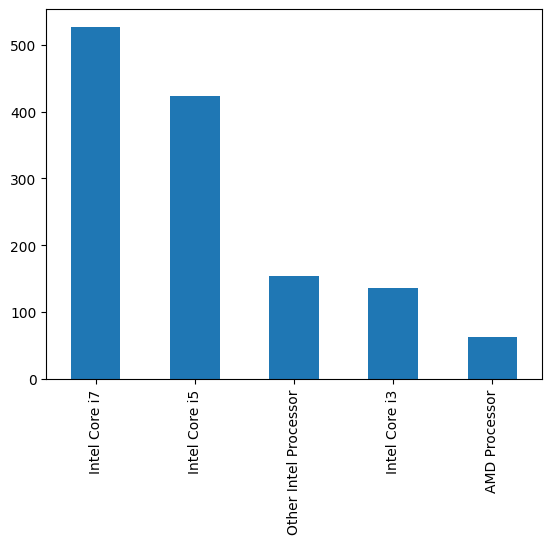

In [44]:
df['Cpu_brand'].value_counts().plot(kind='bar')

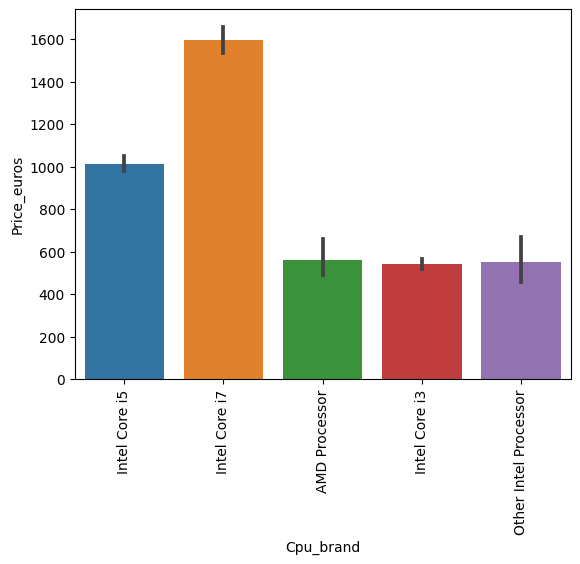

In [45]:
#with price
sns.barplot(x=df['Cpu_brand'],y=df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()


In [46]:
#now drop Cpu and Cpu_name Column
df.drop(columns=['Cpu','Cpu_Name'],inplace=True)

In [47]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,PPI,Cpu_brand
5,Acer,Notebook,4,500GB HDD,AMD Radeon R5,Windows 10,2.10,400.0,0,0,100.454670,AMD Processor
1151,HP,Notebook,4,500GB HDD,AMD Radeon R2 Graphics,Windows 10,1.86,297.0,0,0,100.454670,AMD Processor
762,Google,Ultrabook,8,256GB SSD,Intel HD Graphics 615,Chrome OS,1.10,1559.0,1,0,234.507400,Intel Core i5
1010,Dell,Gaming,8,1.0TB Hybrid,Nvidia GeForce GTX 1050,Windows 10,2.65,949.0,0,0,141.211998,Intel Core i5
759,Acer,Notebook,4,256GB SSD,Intel HD Graphics 620,Windows 10,2.10,599.0,0,0,100.454670,Intel Core i5


<Axes: >

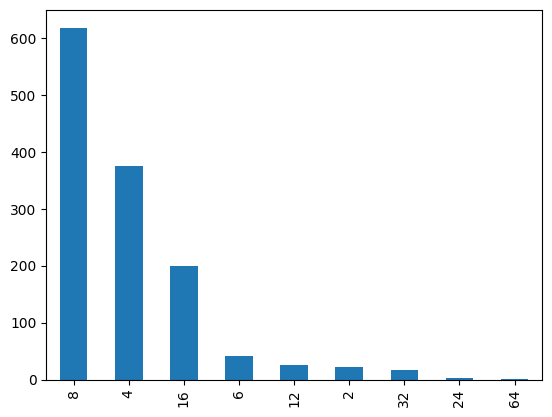

In [48]:
#Now Ram
df['Ram'].value_counts().plot(kind='bar')

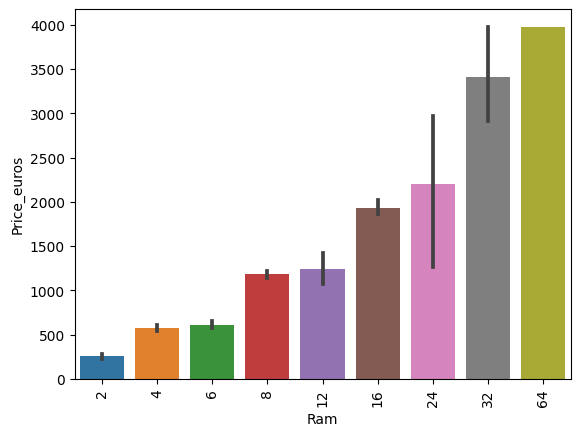

In [49]:
#with price
sns.barplot(x=df['Ram'],y=df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

In [50]:
#now  Memory
#df['Memory'].value_counts().plot(kind='bar')
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [51]:
#transform the Memory column acc. to category

df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
mem_df = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= mem_df[0]
df["first"]=df["first"].str.strip()

df["second"]= mem_df[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)


<ipython-input-51-ff944ea1c8c7>:18: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-51-ff944ea1c8c7>:27: FutureWarning:

The default value of regex will change from True to False in a future version.



In [52]:
#now drop Memory 
df.drop(columns=['Memory'],inplace=True)

In [53]:
df.sample(5)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,PPI,Cpu_brand,HDD,SSD,Hybrid,Flash_Storage
1225,Asus,Notebook,4,Intel HD Graphics 405,Windows 10,2.65,309.00,0,0,100.454670,Other Intel Processor,1000,0,0,0
496,Lenovo,Notebook,8,Intel UHD Graphics 620,Windows 10,2.17,898.90,0,0,141.211998,Intel Core i7,0,256,0,0
1121,HP,Notebook,8,Intel HD Graphics 520,Windows 10,1.16,1690.00,0,0,165.632118,Intel Core i5,0,256,0,0
272,Dell,Notebook,8,AMD Radeon 520,Linux,2.14,735.07,0,0,141.211998,Intel Core i7,0,256,0,0
210,Acer,Notebook,8,Nvidia GeForce GTX 1050,Linux,2.40,779.00,0,0,141.211998,Intel Core i7,1000,0,0,0


In [54]:
#check the Correlation
df.corr()['Price_euros']

<ipython-input-54-e3cd1cb13c7f>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Ram              0.743007
Weight           0.210370
Price_euros      1.000000
TouchScreen      0.191226
IPS              0.252208
PPI              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price_euros, dtype: float64

In [55]:
df.corr()['Price_euros'].apply(abs).sort_values()

<ipython-input-55-f90579cb5c17>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Hybrid           0.007989
Flash_Storage    0.040511
HDD              0.096441
TouchScreen      0.191226
Weight           0.210370
IPS              0.252208
PPI              0.473487
SSD              0.670799
Ram              0.743007
Price_euros      1.000000
Name: Price_euros, dtype: float64

In [56]:
#remove hybrid and Flash_Storage acc. to Correlation
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [57]:
#now GPU
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [58]:
#for brand name only
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [59]:
df.sample(4)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,PPI,Cpu_brand,HDD,SSD,Gpu brand
1136,HP,Workstation,8,Nvidia Quadro M3000M,Windows 7,3.00,3949.40,0,1,127.335675,Intel Core i7,0,256,Nvidia
1014,HP,Notebook,4,Intel HD Graphics 620,Windows 10,1.49,800.00,0,0,117.826530,Intel Core i3,500,0,Intel
87,HP,Notebook,8,Intel HD Graphics 620,Windows 10,1.96,598.99,0,0,141.211998,Intel Core i5,0,256,Intel
1197,Asus,Gaming,16,Nvidia GeForce GTX 980M,Windows 10,4.30,2150.00,0,1,127.335675,Intel Core i7,1000,512,Nvidia


In [60]:
df['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu brand, dtype: int64

In [61]:
#remove ARM bcz only 1 laptop 
df = df[df['Gpu brand'] != 'ARM']

In [62]:
df['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu brand, dtype: int64

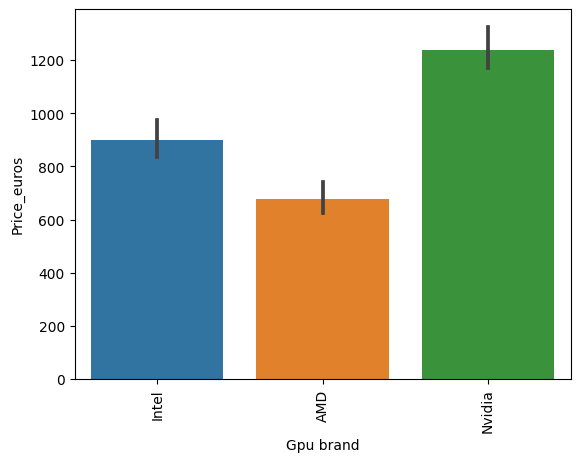

In [63]:
sns.barplot(x=df['Gpu brand'],y=df['Price_euros'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

In [64]:
df.drop(columns=['Gpu'],inplace=True)

<ipython-input-64-6552775d328b>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [65]:
df.sample(3)

,Company,TypeName,Ram,OpSys,Weight,Price_euros,TouchScreen,IPS,PPI,Cpu_brand,HDD,SSD,Gpu brand
909,LG,Ultrabook,8,Windows 10,0.98,1899.0,1,1,157.350512,Intel Core i7,0,512,Intel
182,Lenovo,2 in 1 Convertible,16,Windows 10,1.40,1849.0,1,1,316.965060,Intel Core i7,0,512,Intel
9,Acer,Ultrabook,8,Windows 10,1.60,770.0,0,1,157.350512,Intel Core i5,0,256,Intel


In [66]:
#now OpSys
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

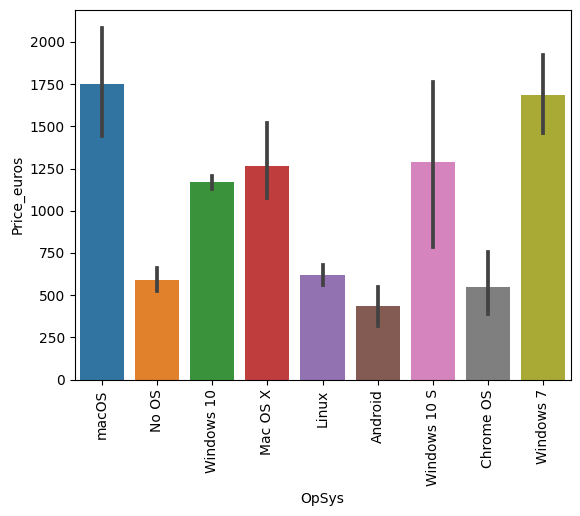

In [67]:
sns.barplot(x=df['OpSys'],y=df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

In [68]:
def cat_os(value):
    if value == 'Windows 10' or value == 'Windows 7' or value == 'Windows 10 S':
        return 'Windows'
    elif value == 'macOS' or value == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'


In [69]:
df['os'] = df['OpSys'].apply(cat_os)

<ipython-input-69-38671a3c07bd>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [70]:
df.sample(3)

,Company,TypeName,Ram,OpSys,Weight,Price_euros,TouchScreen,IPS,PPI,Cpu_brand,HDD,SSD,Gpu brand,os
785,MSI,Gaming,16,Windows 10,1.60,1891.00,0,1,157.350512,Intel Core i7,1000,256,Nvidia,Windows
91,Acer,Notebook,8,Windows 10,2.20,689.00,0,0,141.211998,Intel Core i7,1000,0,Nvidia,Windows
1034,HP,Notebook,8,Windows 10,1.84,1228.99,0,0,141.211998,Intel Core i7,0,256,Intel,Windows


In [71]:
df.drop(columns=['OpSys'],inplace=True)

<ipython-input-71-b4b9708ecded>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [72]:
df

,Company,TypeName,Ram,Weight,Price_euros,TouchScreen,IPS,PPI,Cpu_brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,1339.69,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,898.94,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,575.00,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,2537.45,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,1803.60,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,638.00,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1499.00,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,229.00,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,764.00,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


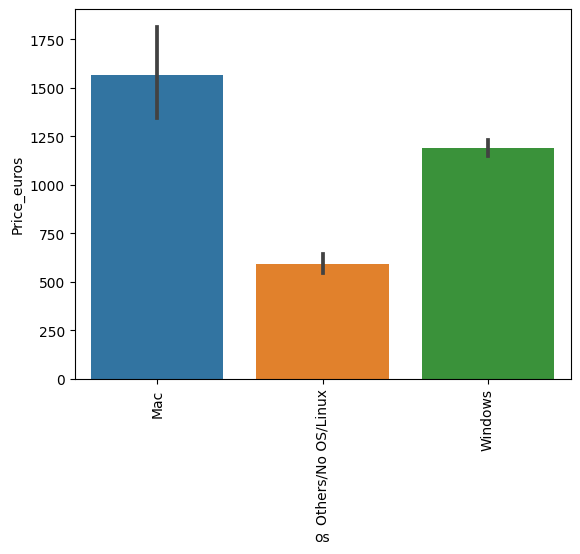

In [73]:
sns.barplot(x=df['os'],y=df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

<ipython-input-74-05ee4c8848be>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Weight', ylabel='Density'>

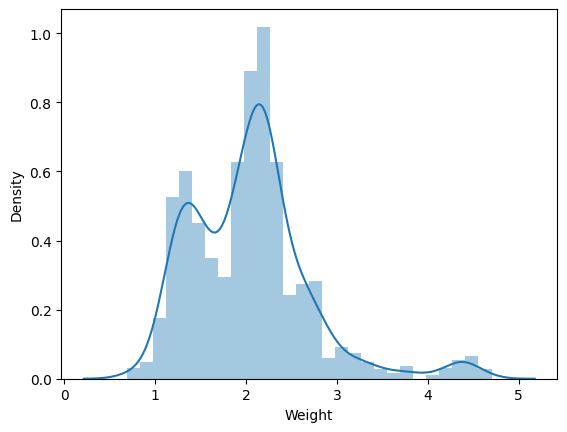

In [74]:
sns.distplot(df['Weight'])

<Axes: xlabel='Weight', ylabel='Price_euros'>

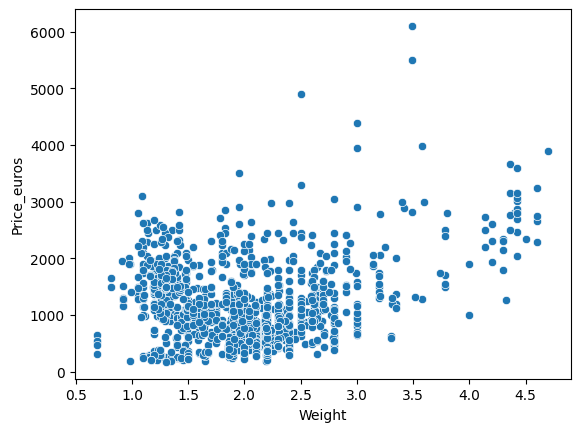

In [75]:
sns.scatterplot(x=df['Weight'],y=df['Price_euros'])


In [76]:
df.corr()['Price_euros'].apply(abs).sort_values()

<ipython-input-76-f90579cb5c17>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



HDD            0.096891
TouchScreen    0.192917
Weight         0.209867
IPS            0.253320
PPI            0.475368
SSD            0.670660
Ram            0.742905
Price_euros    1.000000
Name: Price_euros, dtype: float64

<ipython-input-77-aa4f4450a243>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

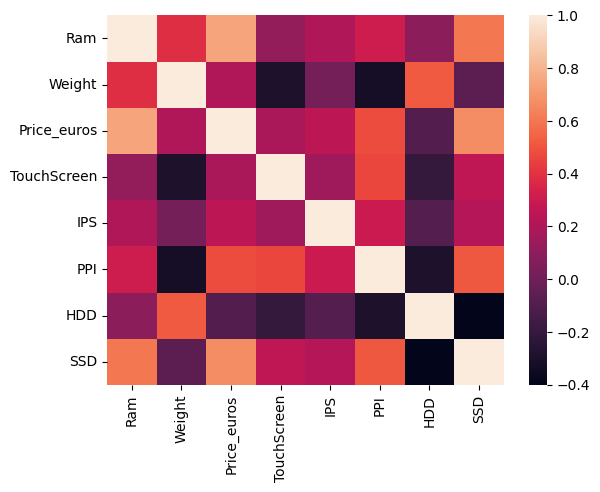

In [77]:
sns.heatmap(df.corr())

<ipython-input-78-9e9b246a0d78>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Price_euros', ylabel='Density'>

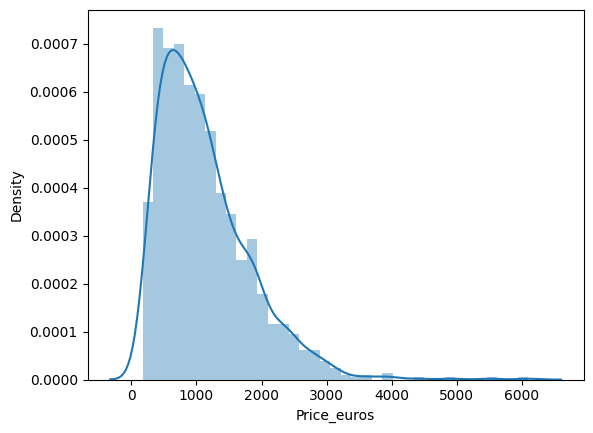

In [78]:
sns.distplot(df['Price_euros'])

<ipython-input-79-84184f205dc7>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Price_euros', ylabel='Density'>

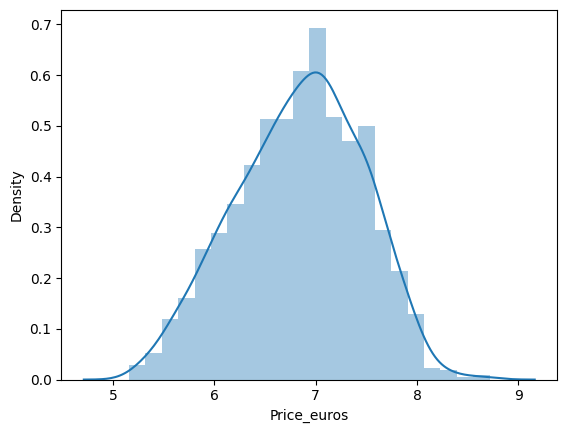

In [79]:
#right skew
#use OneHotEncoder
#log trans.
#use column transformer along with scikit-learn pipeline
sns.distplot(np.log(df['Price_euros']))
#now looking cool


In [80]:
df.dtypes

Company         object
TypeName        object
Ram              int32
Weight         float32
Price_euros    float64
TouchScreen      int64
IPS              int64
PPI            float64
Cpu_brand       object
HDD              int64
SSD              int64
Gpu brand       object
os              object
dtype: object

<ipython-input-81-84184f205dc7>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Price_euros', ylabel='Density'>

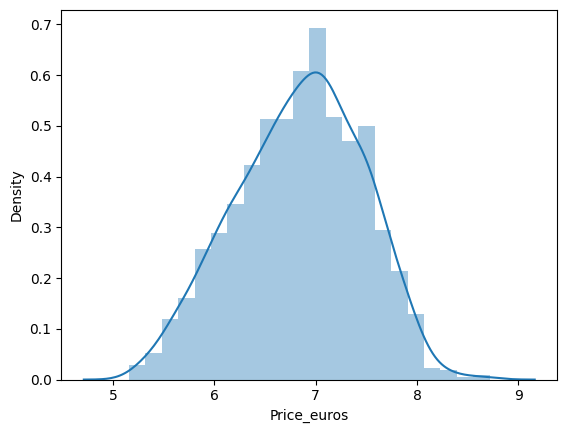

In [81]:
#right skew
#use OneHotEncoder
#log trans.
#use column transformer along with scikit-learn pipeline
sns.distplot(np.log(df['Price_euros']))
#now looking cool


In [82]:
X = df.drop(columns=['Price_euros'])
y = df['Price_euros']

In [83]:
X

,Company,TypeName,Ram,Weight,TouchScreen,IPS,PPI,Cpu_brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [84]:
y

0       1339.69
1        898.94
2        575.00
3       2537.45
4       1803.60
         ...   
1298     638.00
1299    1499.00
1300     229.00
1301     764.00
1302     369.00
Name: Price_euros, Length: 1302, dtype: float64

In [85]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

In [86]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15)


In [87]:
X_train

,Company,TypeName,Ram,Weight,TouchScreen,IPS,PPI,Cpu_brand,HDD,SSD,Gpu brand,os
139,HP,Notebook,4,1.32,0,1,165.632118,Intel Core i5,0,256,Intel,Windows
1120,Vero,Notebook,4,1.35,0,0,165.632118,Other Intel Processor,0,0,Intel,Windows
850,HP,Notebook,4,1.86,0,0,100.454670,Other Intel Processor,0,128,Intel,Others/No OS/Linux
764,Dell,Notebook,4,1.65,0,0,117.826530,Intel Core i3,500,0,Intel,Windows
433,Lenovo,Workstation,16,2.30,0,1,282.423996,Intel Core i7,0,512,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
984,Toshiba,Notebook,4,1.75,0,0,111.935204,Intel Core i5,500,0,Intel,Windows
272,Dell,Notebook,8,2.14,0,0,141.211998,Intel Core i7,0,256,AMD,Others/No OS/Linux
966,Dell,Notebook,4,1.90,0,0,100.454670,Intel Core i5,500,0,Intel,Windows
580,Mediacom,Notebook,4,1.45,0,1,157.350512,Other Intel Processor,0,32,Intel,Windows


In [88]:
X_test

,Company,TypeName,Ram,Weight,TouchScreen,IPS,PPI,Cpu_brand,HDD,SSD,Gpu brand,os
680,MSI,Gaming,8,2.20,0,0,141.211998,Intel Core i5,0,256,Nvidia,Windows
483,Chuwi,Notebook,4,1.89,0,0,141.211998,Other Intel Processor,0,0,Intel,Windows
13,Dell,Notebook,4,2.20,0,0,141.211998,Intel Core i3,0,256,AMD,Windows
88,Asus,Gaming,16,2.20,0,1,141.211998,Intel Core i7,1000,128,Nvidia,Windows
387,Dell,Workstation,8,2.23,0,0,141.211998,Intel Core i5,500,0,AMD,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
776,Lenovo,Notebook,16,2.50,0,0,282.423996,Intel Core i7,0,512,Nvidia,Windows
980,Dell,2 in 1 Convertible,12,2.19,1,1,141.211998,Intel Core i7,0,512,Intel,Windows
1219,Acer,2 in 1 Convertible,8,1.20,1,1,157.350512,Intel Core i7,0,256,Intel,Windows
61,Dell,Ultrabook,8,1.70,0,0,157.350512,Intel Core i5,0,256,Intel,Windows


In [89]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



R2 score 0.797621019161183
MAE 201.32077317256528


In [106]:
X_test

,Company,TypeName,Ram,Weight,TouchScreen,IPS,PPI,Cpu_brand,HDD,SSD,Gpu brand,os
680,MSI,Gaming,8,2.20,0,0,141.211998,Intel Core i5,0,256,Nvidia,Windows
483,Chuwi,Notebook,4,1.89,0,0,141.211998,Other Intel Processor,0,0,Intel,Windows
13,Dell,Notebook,4,2.20,0,0,141.211998,Intel Core i3,0,256,AMD,Windows
88,Asus,Gaming,16,2.20,0,1,141.211998,Intel Core i7,1000,128,Nvidia,Windows
387,Dell,Workstation,8,2.23,0,0,141.211998,Intel Core i5,500,0,AMD,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
776,Lenovo,Notebook,16,2.50,0,0,282.423996,Intel Core i7,0,512,Nvidia,Windows
980,Dell,2 in 1 Convertible,12,2.19,1,1,141.211998,Intel Core i7,0,512,Intel,Windows
1219,Acer,2 in 1 Convertible,8,1.20,1,1,157.350512,Intel Core i7,0,256,Intel,Windows
61,Dell,Ultrabook,8,1.70,0,0,157.350512,Intel Core i5,0,256,Intel,Windows


In [108]:
# Converting X_test is a Pandas DataFrame
X_test.to_csv('testing.csv', index=False)

In [90]:
# step2 = RandomForestRegressor(n_estimators=100,
#                               random_state=3,
#                               max_samples=0.5,
#                               max_features=0.75,
#                               max_depth=15)

# pipe = Pipeline([
#     ('step1',step1),
#     ('step2',step2)
# ])

# pipe.fit(X_train,y_train)



In [91]:
pipe.score(X_test, y_test)

0.797621019161183

In [92]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=y_pred,
        y=y_test,
        mode='markers'
    )
)

fig.add_trace(
    go.Scatter(
        x=[0, 6000],
        y=[0, 6000],
        mode='lines',
        line=dict(color='red')
    )
)

fig.update_layout(
    width=800,
    height=600,
    xaxis_title='Predicted Values',
    yaxis_title='Actual Values'
)

fig.show()


Saving Trained Model

In [93]:
import pickle

In [94]:
filename = "trained_model.sav"

In [95]:
pickle.dump(pipe, open(filename, 'wb'))

Loading saved Model

In [96]:
# Loading model 
loaded_model = pickle.load(open('trained_model.sav', 'rb'))